# Vehicle Price Analysis

We will use a dataset containing information about vehicles sold on a website over a period of time. The goal of this analysis is to study the data and determine which factors influence the price. 

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

car_data = pd.read_csv('/datasets/vehicles_us.csv')

# let's take a look at the head
display(car_data.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [2]:
# and then a general description
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusion

There are a lot of great features to work with in this dataset. We have thirteen columns of a few different types of data. From the head we can already see there are some missing values we will need to address, some data types we can convert, and some new features we can engineer. 

## Data preprocessing

In [3]:
nulls = car_data.isnull().sum()

# let's display how many nulls there are and then display the percentage of missing nulls 
print(nulls)
print()
print(nulls / len(car_data) * 100)

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


So we have five total columns with missing values: model_year, cylinders, odometer, paint_color, and is_4wd. From the head we can start to break down some potential reasons why these values are missing. <br><br>
Starting with the model_year, most likely these values are just missing. It's 7% of the entire dataset. We can run a comparison to see if the missing model_year rows line up with any others, or just fill them in with the median or mean. The model_year likely has a significant impact on the price of the vehicle, so it may also just be safer to toss these out due to the small amount. <br><br>
The missing values in cylinders may fall into the same category as model_year. We'll examine them also to see if there any any patterns we can take advantage of. I think this may have less of an impact overall so it may be safest to fill this in with the median or mean. <br><br>
The odometer null values are going to be tricky. There are a lot (15%) and it could be due to general missing data, or perhaps even due to it being a new vehicle or one that was never purchased and driven. We will need to examine this more to look for patterns. <br><br>
The missing values in paint_color will also need to be examined for patterns. There should be a color, so perhaps the most common color can be used as a fill-in. <br><br>
The last column, is_4wd, will be an easy one to take care of. Roughly half are missing, but the feature is simply a boolean column, where 1 = True (the car has 4wd) and 0 or null = False (the car is not 4wd). We can simply convert this to a boolean column to take care of the "missing" values. Let's get started with that first.

In [4]:
car_data.is_4wd = car_data.is_4wd.astype('bool')
car_data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd             bool
date_posted      object
days_listed       int64
dtype: object

In [5]:
# next we will address the missing paint color.
# I'm thinking this is best done by filling it in with the average color
# the value may not impact the price very much but there is too much data to warrant dropping all of the rows

car_data.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [6]:
# the values all make sense so let's determine the most common one
car_data.groupby('paint_color')['is_4wd'].count().sort_values(ascending=False)

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: is_4wd, dtype: int64

White is clearly the most common color. It may be safest to fill in white for all of the null values as well.

In [7]:
car_data.paint_color.fillna('white', inplace=True)

# verify
print(car_data.isna().sum())

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


In [8]:
# this leaves with with three more.
# I think we can drop these last three, as there are not too many
# relative to the size of the dataframe. 

car_data.dropna(inplace=True)

# verify
print(car_data.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


Ok, the missing values are now taken care of. Next, we'll examine the dataframe again and see if there are any data types we need to adjust.

In [9]:
display(car_data.head(5))
car_data.dtypes

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,True,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,True,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,True,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,True,2018-12-27,73


price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd             bool
date_posted      object
days_listed       int64
dtype: object

We should convert the model_year, cylinders, and odometer into an int, instead of a float. The decimals are unnecessary. The date_posted should also be in datetime format, instead of an object, as we can more easily pull values (like the month or year) from it. Otherwise, everything looks to be ok. We will want to examine the other object columns (like model) to make sure the strings are all legible and consistent, but for now let's switch the types.

In [10]:
car_data.model_year = car_data.model_year.astype('int64')
car_data.cylinders = car_data.cylinders.astype('int64')
car_data.odometer = car_data.odometer.astype('int64')
car_data.date_posted = pd.to_datetime(car_data.date_posted, format='%Y-%m-%d')

# verify
car_data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Ok great, the last thing we should look at before running our analysis are the unique values in our object columns. We should make sure the values are unique and that there are no typos. 

In [11]:
sorted(car_data.model.unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

I'm no car expert, but almost everything appears to be ok here. The only values that jump out to me are the Ford pick-up trucks. The F-150 and F150 are likely the same, as are the 250 and 350, and sd and super duty are the same, so let's normalize those to make them comparable.

In [12]:
car_data.model = car_data.model.replace({'ford f-150':'ford f150',
                                         'ford f-250':'ford f250',
                                         'ford f-250 sd':'ford f250 super duty',
                                         'ford f-250 super duty':'ford f250 super duty',
                                         'ford f-350 sd':'ford f350 super duty'})

In [13]:
sorted(car_data.condition.unique())

['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

In [14]:
# no issues there, so let's move on to the next
sorted(car_data.fuel.unique())

['diesel', 'electric', 'gas', 'hybrid', 'other']

In [15]:
# another good one, next
sorted(car_data.transmission.unique())

['automatic', 'manual', 'other']

In [16]:
# one more to go, as we already examined paint_color
sorted(car_data.type.unique())

['SUV',
 'bus',
 'convertible',
 'coupe',
 'hatchback',
 'mini-van',
 'offroad',
 'other',
 'pickup',
 'sedan',
 'truck',
 'van',
 'wagon']

Ok, so all of the values appear to make sense and without typos. We have added in the some missing values where a reasonable fill value can be determined, and removed the rows with missing values where we deemed it appropriate. We also changed some of our data types so that they would be easier to work with and analyze. Before we move onto the next step, let's check for duplicates. We'll have more success now that our strings are cleaner.

In [17]:
car_data.duplicated().sum()

0

All clear! Next we will start to pull some new features out of the columns we cleaned to prepare our dataframe for EDA.

## Feature Engineering

The first new features we want to extract are the individual values of the datetime column (month, day, and year). We will be able to work with the feature much easier if we split each piece into it's own column. Fortunately, the hard work of converting is already done, so all we need to do is pull them into three new columns.

In [18]:
car_data['ad_day_of_week'] = pd.DatetimeIndex(car_data['date_posted']).dayofweek

# now to make it a little more user friendly
car_data['ad_day_of_week'] = car_data['ad_day_of_week'].replace({0:'Monday',
                                                                 1:'Tuesday',
                                                                 2:'Wednesday',
                                                                 3:'Thursday',
                                                                 4:'Friday',
                                                                 5:'Saturday',
                                                                 6:'Sunday'})

# verify
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day_of_week
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,True,2018-06-23,19,Saturday
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,Thursday
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,Tuesday
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,True,2018-12-27,73,Thursday


In [19]:
# the other two we can keep as is (integers)
car_data['ad_month'] = pd.DatetimeIndex(car_data.date_posted).month
car_data['ad_year'] = pd.DatetimeIndex(car_data.date_posted).year

# verify
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day_of_week,ad_month,ad_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,True,2018-06-23,19,Saturday,6,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,Thursday,2,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,Tuesday,4,2019
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,6,2018
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,True,2018-12-27,73,Thursday,12,2018


Now that we've pulled the easy values out, we can use them to calculate some additional features. It may be helpful for us to know the age of the vehicle when the ad was placed, the average mileage per year, and to convert the condition of the vehicle into integers (instead of another object column). Let's start with the age.

In [20]:
car_data['vehicle_age'] = car_data['ad_year'] - car_data['model_year']

# next we'll do the average mileage
car_data['avg_mileage_per_year'] = car_data['odometer'] / car_data['vehicle_age']

# lastly we'll do the column conversion
car_data['condition'] = car_data['condition'].replace({'new':5,
                                                       'like new':4,
                                                       'excellent':3,
                                                       'good':2,
                                                       'fair':1,
                                                       'salvage':0})

Now that we've pulled out all of the additional features we want, we are almost ready to start the EDA. The last thing we should probably do is reset the index, just to put a nice bow on our pre-processing.

In [21]:
car_data.reset_index(drop=True)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day_of_week,ad_month,ad_year,vehicle_age,avg_mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,white,True,2018-06-23,19,Saturday,6,2018,7,20714.285714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,Thursday,2,2019,6,18333.333333
2,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,Tuesday,4,2019,2,40451.500000
3,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,6,2018,4,14488.500000
4,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,True,2018-12-27,73,Thursday,12,2018,3,26404.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36414,3750,2005,ford taurus,3,6,gas,110200,automatic,sedan,silver,True,2018-08-10,63,Friday,8,2018,13,8476.923077
36415,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,True,2018-10-03,37,Wednesday,10,2018,5,17627.200000
36416,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,True,2018-11-14,22,Wednesday,11,2018,16,11343.750000
36417,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,True,2018-11-15,32,Thursday,11,2018,9,14222.222222


Great - now we have some new features to work with during our EDA. Performing these calculations ahead of time will help us make a more detailed analysis of how these factors impact a vehicle's price.

## EDA

Now we are ready to start examining our features. We will start with some histograms to get a good look at all of our data, and to see if there are any outliers/problematic values we may need to trim off.

In [22]:
car_data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,ad_month,ad_year,vehicle_age,avg_mileage_per_year
count,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,3.641800e+04
mean,12187.675417,2009.753425,2.637003,6.132596,115323.632747,39.649798,6.643867,2018.306324,8.552898,inf
std,10076.739680,6.265305,0.713758,1.659646,65068.650067,28.119391,3.468755,0.460972,6.276994,NaN
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000e+00
25%,5000.000000,2006.000000,2.000000,4.000000,69854.000000,19.000000,3.000000,2018.000000,4.000000,1.079364e+04
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,7.000000,2018.000000,7.000000,1.540000e+04
75%,16900.000000,2014.000000,3.000000,8.000000,155000.000000,53.000000,10.000000,2019.000000,12.000000,2.275000e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,12.000000,2019.000000,110.000000,inf


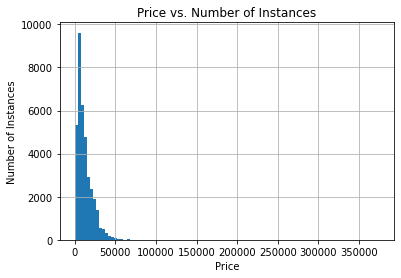

In [23]:
car_data.price.hist(bins=100)
plt.title('Price vs. Number of Instances')
plt.xlabel('Price')
plt.ylabel('Number of Instances')
plt.show()

Looks like we have most of our data between 0 and 50-75k. From the describe method, we can see that we have at least one huge value at 375k that is skewing our histogram. We will note this to pull into our outlier dataframe.

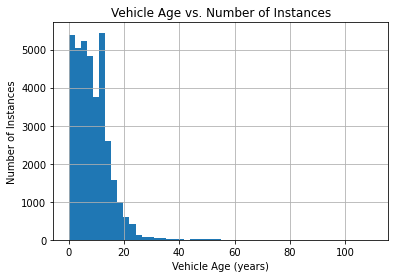

In [24]:
car_data.vehicle_age.hist(bins=50)
plt.title('Vehicle Age vs. Number of Instances')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Number of Instances')
plt.show()

Our outliers here seem to be after 40 or so. Looking at histogram, the distribution appears to be heavily concentrated under 15 years, with a long tail towards 30-40 years old. 

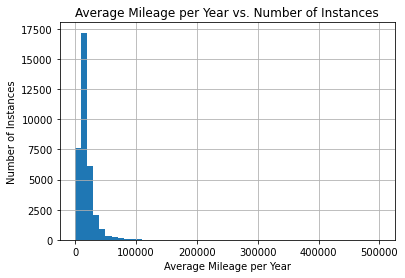

In [25]:
# we have some infinite values in here, which are most likely incorrect
# as a result, we have to be creative with the range
car_data.avg_mileage_per_year.hist(bins=50, range=(0, 500000))
plt.title('Average Mileage per Year vs. Number of Instances')
plt.xlabel('Average Mileage per Year')
plt.ylabel('Number of Instances')
plt.show()

Looks like our data is mostly under 50-75k, so we will remove anything above it to our outlier dataframe. We have a heavy concentration of instances around 20-30k miles per year.

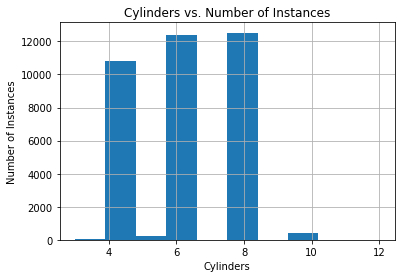

In [26]:
car_data.cylinders.hist()
plt.title('Cylinders vs. Number of Instances')
plt.xlabel('Cylinders')
plt.ylabel('Number of Instances')
plt.show()

Most of the data is between 4 and 8. Interestingly (and expected) they are almost exclusively even numbers.

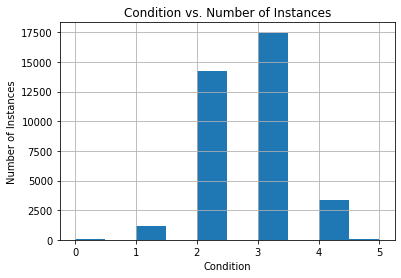

In [27]:
car_data.condition.hist()
plt.title('Condition vs. Number of Instances')
plt.xlabel('Condition')
plt.ylabel('Number of Instances')
plt.show()

Another pretty straightforward one. Most of the car conditions are set to 2 and 3 (good and excellent). <br><br>

Now that we know where our data is mostly focused, we can pull the outliers into a new dataframe and re-analyze our cleaned dataframe.

In [28]:
outlier_data = car_data.query(
    'price > 75000 | vehicle_age > 40 | avg_mileage_per_year > 75000 | cylinders < 4 | cylinders > 8 | condition < 2'
)

In [29]:
clean_car_data = car_data.drop(outlier_data.index, axis=0)

In [30]:
# now to reset the index again
clean_car_data.reset_index(drop=True)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day_of_week,ad_month,ad_year,vehicle_age,avg_mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,white,True,2018-06-23,19,Saturday,6,2018,7,20714.285714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,Thursday,2,2019,6,18333.333333
2,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,Tuesday,4,2019,2,40451.500000
3,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,6,2018,4,14488.500000
4,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,True,2018-12-27,73,Thursday,12,2018,3,26404.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,11000,2012,dodge charger,3,8,gas,81000,automatic,sedan,black,True,2019-04-19,44,Friday,4,2019,7,11571.428571
32772,3750,2005,ford taurus,3,6,gas,110200,automatic,sedan,silver,True,2018-08-10,63,Friday,8,2018,13,8476.923077
32773,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,True,2018-10-03,37,Wednesday,10,2018,5,17627.200000
32774,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,True,2018-11-15,32,Thursday,11,2018,9,14222.222222


Now that we removed our outliers, let's take another look at the earlier histograms to see if we can pull anything new out.

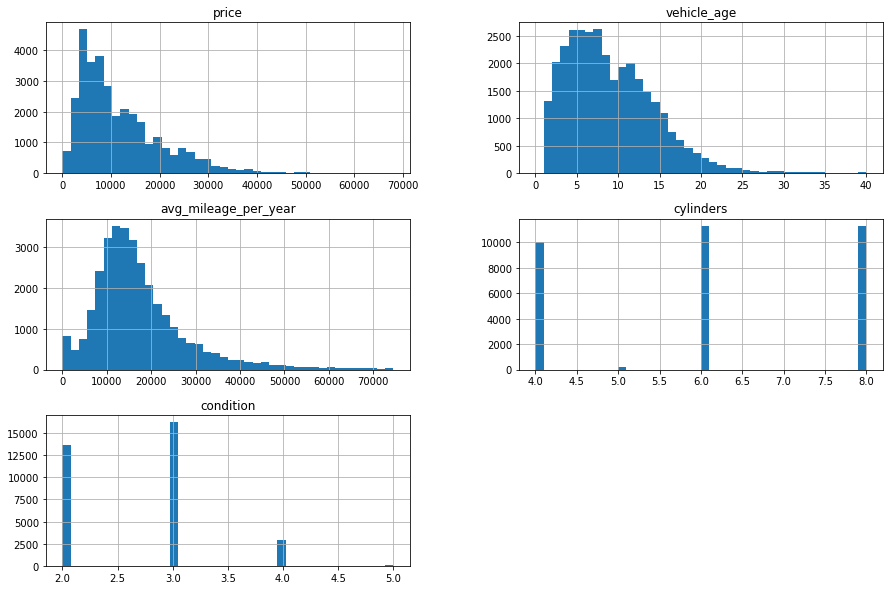

In [31]:
clean_car_data[['price', 'vehicle_age', 'avg_mileage_per_year', 'cylinders', 'condition']].hist(bins=40, figsize=(15,10));

Overall we have a much clearer picture of the data these histograms. There is a clear peak in three of them on the left side with a long tail moving to the right (towards our outliers now removed). Cylinders and condition were not too crowded so we are ultimately left with the same results here - the data is crowded towards the middle (4, 6, 8 for cylinders and 2 or 3 for condition).

Next, let's see if we can observe anything from the number of days each ad is listed.

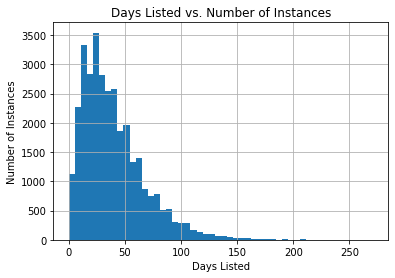

In [32]:
clean_car_data.days_listed.hist(bins=50)
plt.title('Days Listed vs. Number of Instances')
plt.xlabel('Days Listed')
plt.ylabel('Number of Instances')
plt.show()

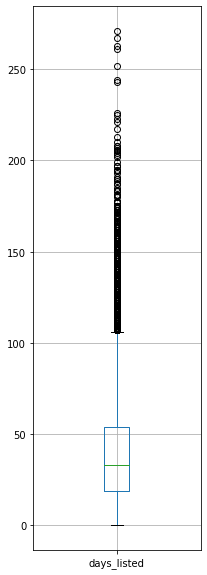

In [33]:
clean_car_data.boxplot(column='days_listed', figsize=(3,10));

In [34]:
print("The median is: ", clean_car_data.days_listed.median())
clean_car_data.days_listed.describe()

The median is:  33.0


count    32776.000000
mean        39.684495
std         28.177050
min          0.000000
25%         19.000000
50%         33.000000
75%         54.000000
max        271.000000
Name: days_listed, dtype: float64

The median is 33 and mean is 39. This offset tells us that the data is focused more to the left, and some particularly high values are pulling the mean to the right. These outliers affecting the mean are clearly observed in the box plot. It appears as if these outliers start at a little over 100 days. The typical lifetime of an ad appears to be a little over one month.

In [35]:
print(clean_car_data.query("days_listed == 0").shape[0])

33


There are 33 instances where the ad was removed on the same day (or the data is corrupted here). From the histogram, we can also see that some ads were up for over 100 days! <br><br>
We will consider any ad here that was placed and removed on the same day as an outlier. This is atypical of most online sales, as it usually takes at least a day to discuss and complete a sale. We will also consider any ad up for longer than 150 days as an outlier. Most of the data appears to be with ads up for less than 150 days. The tail of our histogram starts to flatten at this point, informing us that we have a very small number of instances after this point. Because of the existance of these outliers, it would be more accurate for us to use the median as our "typical ad lifetime" instead of the mean. In this case, a typical ad would be up for 33 days.


In [36]:
# upper end is 150 to give us a reasonable amount of data
# 100 was too big
ad_outliers = clean_car_data.query("days_listed == 0 | days_listed > 150")
ad_outliers.shape

(185, 18)

In [37]:
ad_outliers.query("days_listed == 0").describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day_of_week,ad_month,ad_year,vehicle_age,avg_mileage_per_year
count,33.000000,33.000000,33,33.000000,33.000000,33,33.000000,33,33,33,33,33,33.0,33,33.000000,33.000000,33.000000,33.000000
unique,NaN,NaN,24,NaN,NaN,2,NaN,3,9,8,1,33,NaN,7,NaN,NaN,NaN,NaN
top,NaN,NaN,chevrolet silverado 1500,NaN,NaN,gas,NaN,automatic,truck,silver,True,2018-05-15 00:00:00,NaN,Monday,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,NaN,NaN,32,NaN,29,10,9,33,1,NaN,9,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,10604.242424,2007.000000,NaN,2.696970,6.060606,NaN,122494.212121,NaN,NaN,NaN,NaN,NaN,0.0,NaN,7.242424,2018.212121,11.212121,14779.459251
std,6975.432814,7.802243,NaN,0.728219,1.619016,NaN,68071.107573,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.795424,0.415149,7.692356,12227.193651
min,1500.000000,1985.000000,NaN,2.000000,4.000000,NaN,162.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.000000,2018.000000,1.000000,20.250000
25%,5000.000000,2004.000000,NaN,2.000000,4.000000,NaN,72000.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,5.000000,2018.000000,5.000000,8479.166667


In [38]:
ad_outliers.query("days_listed > 150").describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day_of_week,ad_month,ad_year,vehicle_age,avg_mileage_per_year
count,152.000000,152.000000,152,152.000000,152.000000,152,152.000000,152,152,152,152,152,152.000000,152,152.000000,152.000000,152.000000,152.000000
unique,NaN,NaN,73,NaN,NaN,3,NaN,3,11,10,1,127,NaN,7,NaN,NaN,NaN,NaN
top,NaN,NaN,chevrolet silverado,NaN,NaN,gas,NaN,automatic,SUV,white,True,2018-11-29 00:00:00,NaN,Thursday,NaN,NaN,NaN,NaN
freq,NaN,NaN,7,NaN,NaN,137,NaN,141,41,47,152,3,NaN,28,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,11875.927632,2010.013158,NaN,2.697368,6.078947,NaN,115454.328947,NaN,NaN,NaN,NaN,NaN,175.157895,NaN,6.453947,2018.335526,8.322368,16662.740947
std,8872.341785,5.130079,NaN,0.661520,1.592725,NaN,60675.482615,NaN,NaN,NaN,NaN,NaN,25.955924,NaN,3.480958,0.473735,5.108883,9565.952617
min,1.000000,1987.000000,NaN,2.000000,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,151.000000,NaN,1.000000,2018.000000,1.000000,0.000000
25%,5899.750000,2007.000000,NaN,2.000000,4.000000,NaN,67928.000000,NaN,NaN,NaN,NaN,NaN,157.000000,NaN,3.000000,2018.000000,5.000000,10883.333333


There appears to be no real discernable difference in the quantitative characteristics of the outliers on either end here. However - the object columns show some similarities. Our zero day ads seem to be all for 4wd vehicles, and appear to favor silver trucks. Our longer ads appear to favor white SUVs, all with 4wd. 

Next, let's examine the number of ads and average price for each type of vehicle. We can also plot these two features together to see if we can examine any relationship.

In [39]:
ad_price_data = np.round(
                clean_car_data.pivot_table(index='type', values='price', aggfunc=['mean', 'count']), 2)

ad_price_data.sort_values(by=('mean', 'price'), ascending=False)

,mean,count
,price,price
type,,
truck,16230.29,7719
pickup,15799.51,4269
offroad,14413.47,150
coupe,13998.27,1427
convertible,13747.15,289
SUV,10946.97,8027
other,10933.92,156
wagon,8895.54,1043


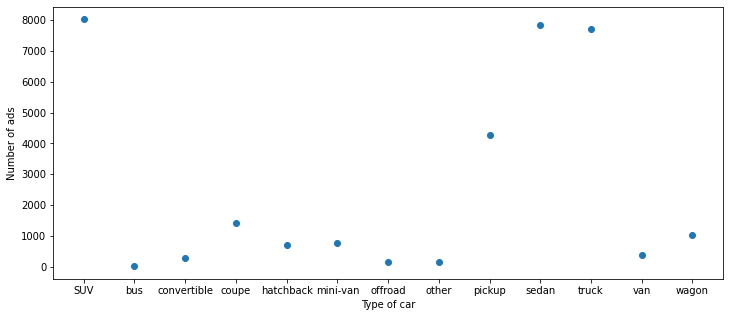

In [40]:
# this table tells us a lot! 
# let's create our graph and then analyze both of these for our conclusion

plt.figure(figsize=(12,5))
plt.scatter(x=ad_price_data.index, y=ad_price_data['count', 'price'])
plt.xlabel('Type of car')
plt.ylabel('Number of ads')
plt.show()

Looking at the previous graph and pivot table, we can conclude that the two types of vehicles with the greatest average price are: Trucks and Pickups, with Offroad not too far behind. Matching this with the above graph, we can also see that Trucks and Pickups have a higher-than-average number of ads. SUVs and Sedans also have a comparible number of ads (SUVs having the most) but end up selling at a lower price. Sedans seem to have one of the lowest average prices. Trucks and Pickups tend to be larger with heavy-duty (and more expensive) components, which may factor in to the higher average selling price. Coupes and Convertibles, which also have a high selling price, may be a result of the luxury nature of those vehicle types. Overall, we can conclude that Trucks overwhelmingly sell at the highest average price, with a larger than average ad count to match.

The last piece we want to analyze here are the factors that impact the selling price the most. Let's analyze each feature and see if we can pull anything from our graphs. 

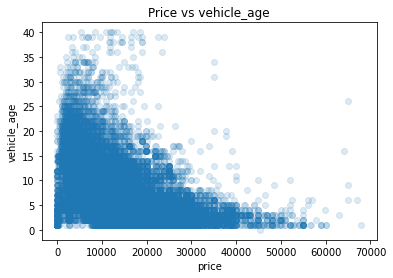

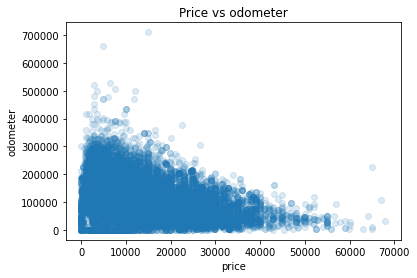

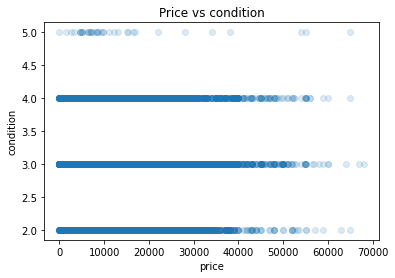

In [41]:
# first lets split our df into two parts
# one df for quantitative features, and another for categorical

quant_car_data = clean_car_data[['price', 'vehicle_age', 'odometer', 'condition']]
categ_car_data = clean_car_data[['transmission', 'paint_color']]

# next let's plot our quantitative data
y_columns = ['vehicle_age', 'odometer', 'condition']
for y_col in y_columns:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(quant_car_data['price'], quant_car_data[y_col], alpha=0.15)
    ax.set_xlabel('price')
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format('Price', y_col))
    plt.show()

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

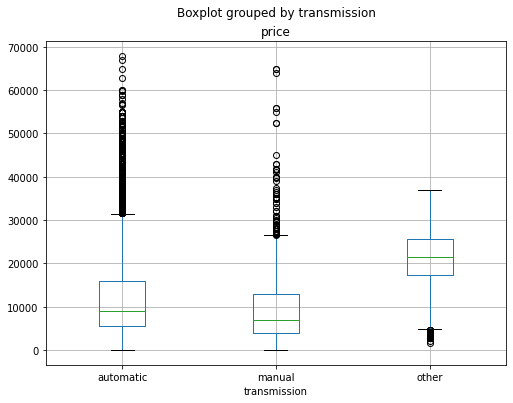

In [42]:
# and our categorical data
clean_car_data.boxplot(by='transmission', column='price', figsize=(8,6))

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

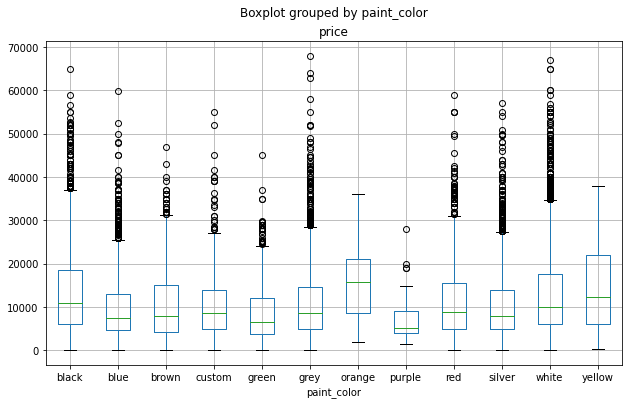

In [43]:
clean_car_data.boxplot(by='paint_color', column='price', figsize=(10,6))

Looking at the above graphs, we can start to see some of the factors that have the greatest impact on the price a vehicle sells for. Starting with the quantitative data, we can see that newer vehicles with less miles on the odometer sell more often sell for a higher price. Condition has less of an "obvious" impact, but we can see that a car in better condition will likely sell for more (condition = 3 or 4). Moving on to the categorical data, we start to see that there are a lot of outliers in our paint color and transmission columns. Overall there does not seem to be an obvious marker for higher prices. Autmoatic and manual vehicles seem to sell at a similar price point, though there does seem to be slightly more higher selling outliers in the automaatic transmission category. The mysterious "other" category seems to do the best. Due to the lack of info we have on what "other" may correspond to, I don't feel comfortable definitively saying that a vehicle with some "other" transmission will sell the best. Paint color also appears to be all over the place. Orange cars appear to sell the best if we do not include outliers. Once we add outliers into the mix, it becomes trickier to say. There does not appear to be any color that affects the price to a noticeable degree. The only real conclusion I can pull from this is that purple cars will not sell well, which makes sense as I can't remember the last time I have seen a purple car.

## Overall conclusion

Our analysis began with a look at the missing values in our dataframe. We addressed the missing values appropriately and then fixed the data types. Once we had our dataframe clean, we started to create new features to help find patterns in our EDA. The EDA showed us our outliers and allowed us to pull them from the main data to make a more accurate analysis. 
<br><br>
Overall, our analysis of car features and their impact on the price a car will sell at has brought us to this conclusion. A car will sell at a higher price if:
- It is a truck, pickup, or offroad vehicle
- It is newer
- It has less miles on the odometer
- It's in good condition (condition = 3 or 4)
- It has an automatic transmission
- It is *not* purple

This information can help us to predict or determine a selling price if we bring a new used vehicle to Crankshaft List. We can also use this information to get a general sale starting point, regardless of where we place the ad.